In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
#boston_df=pd.read_csv('automobile.csv')
#boston_df.head()

In [3]:
import pandas as pd
import numpy as np

# Load Boston dataset from external URL
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Extract data and target values
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert to DataFrame
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
boston_df = pd.DataFrame(data, columns=columns)

# Add the target (MEDV) as a new column
boston_df['MEDV'] = target

# Display the first few rows
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


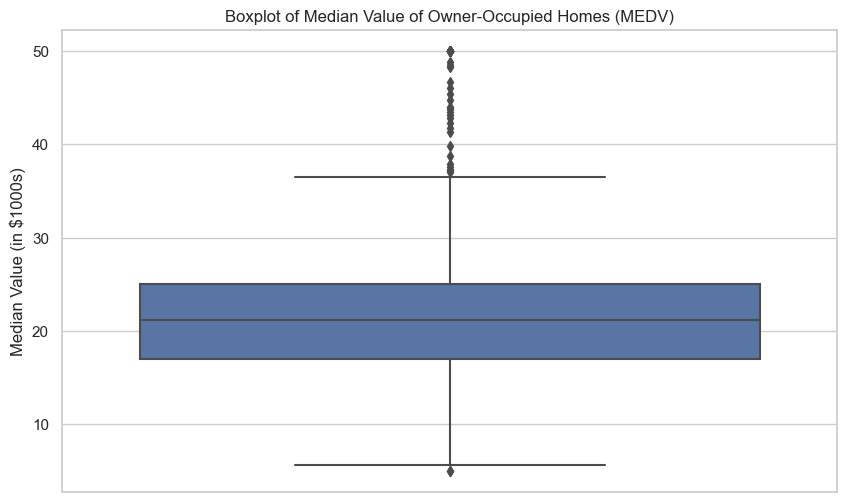

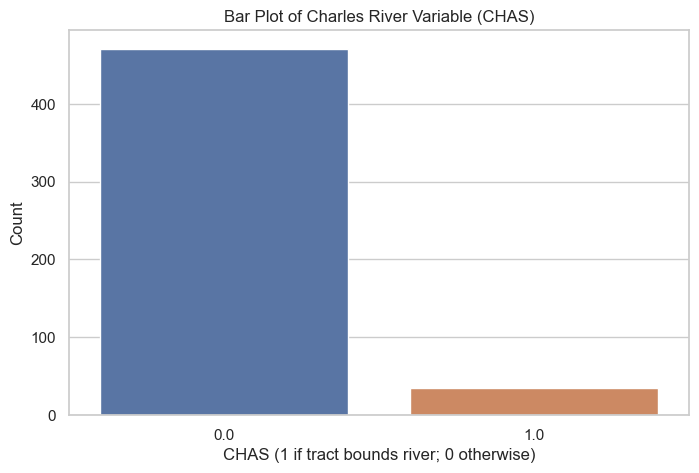

C:\Users\Craigs\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


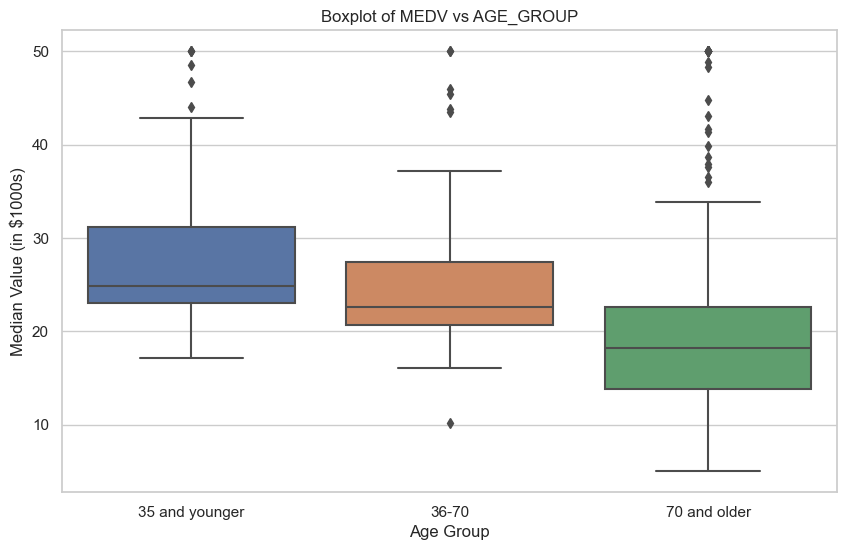

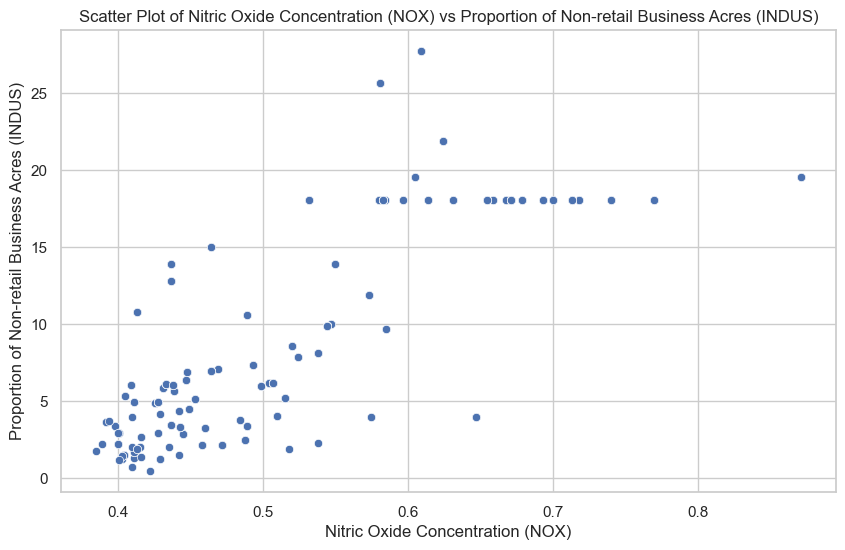

C:\Users\Craigs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


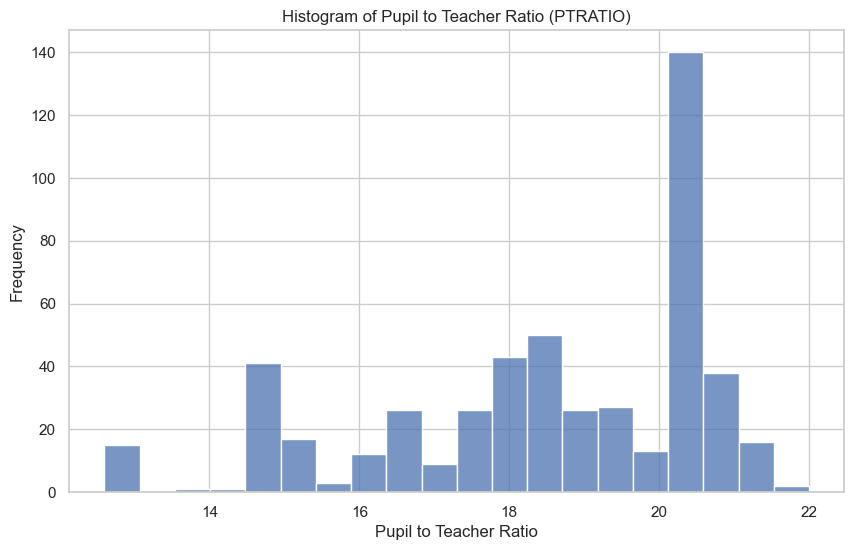

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Boston dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert to DataFrame
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
    "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
boston_df = pd.DataFrame(data, columns=columns)
boston_df['MEDV'] = target

# Create AGE categories
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '36-70', '70 and older'])

# Set up the plotting style
sns.set(style="whitegrid")

# 1. Boxplot for "Median value of owner-occupied homes"
plt.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (in $1000s)')
plt.show()

# 2. Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(8, 5))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

# 3. Boxplot for MEDV vs AGE_GROUP
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs AGE_GROUP')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()

# 4. Scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide Concentration (NOX) vs Proportion of Non-retail Business Acres (INDUS)')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-retail Business Acres (INDUS)')
plt.show()

# 5. Histogram for the pupil to teacher ratio variable (PTRATIO)
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


Boxplot of MEDV: Shows the distribution of median values of homes.
Bar Plot of CHAS: Shows the count of tracts that are bounded by the Charles River (1) vs those that are not (0).
Boxplot of MEDV vs AGE_GROUP: Compares median home values across three age groups of buildings.
Scatter Plot of NOX vs INDUS: Shows a positive relationship between Nitric Oxide concentration and the proportion of non-retail business acres.
Observation: As the Nitric Oxide concentration increases, the proportion of non-retail business acres also increases, indicating a potential industrial effect.
Histogram of PTRATIO: Displays the distribution of pupil-to-teacher ratios across towns.

Independent T-test: To compare median values of houses bounded by the Charles River or not.
ANOVA: To compare the median values across different age groups of houses.
Pearson Correlation: To check the relationship between Nitric Oxide concentrations and non-retail business acres.
Linear Regression: To examine the impact of weighted distance on the median home value.


T-Test: Is there a significant difference in median value of houses bounded by the Charles River?
Hypothesis:
Null Hypothesis (H₀): There is no significant difference in the median value of houses bounded by the Charles River or not.
Alternative Hypothesis (H₁): There is a significant difference in the median value of houses bounded by the Charles River.

In [5]:
from scipy.stats import ttest_ind

# Split the data into two groups: houses bounded by the river and those not
river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform independent T-test
t_stat, p_value = ttest_ind(river_yes, river_no)

# Output the results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median house value.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median house value.")


T-Statistic: 3.9964, P-Value: 0.0001
Reject the null hypothesis: There is a significant difference in median house value.


ANOVA: Is there a difference in Median values of houses (MEDV) for different age groups?
Hypothesis:
Null Hypothesis (H₀): There is no difference in the median value of houses across the different age groups.
Alternative Hypothesis (H₁): There is a significant difference in the median value of houses across the different age groups.

In [6]:
from scipy.stats import f_oneway

# Create age groups
group1 = boston_df[boston_df['AGE_GROUP'] == '35 and younger']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '36-70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70 and older']['MEDV']

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

# Output the results
print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median house value between age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median house value between age groups.")


F-Statistic: 36.4076, P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in median house value between age groups.


Pearson Correlation: Is there a relationship between NOX and INDUS?
Hypothesis:
Null Hypothesis (H₀): There is no correlation between Nitric Oxide concentration and non-retail business acres.
Alternative Hypothesis (H₁): There is a significant correlation between Nitric Oxide concentration and non-retail business acres.

In [7]:
from scipy.stats import pearsonr

# Perform Pearson correlation
corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Output the results
print(f"Correlation Coefficient: {corr_coeff:.4f}, P-Value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between NOX and INDUS.")


Correlation Coefficient: 0.7637, P-Value: 0.0000
Reject the null hypothesis: There is a significant correlation between NOX and INDUS.


Regression Analysis: Impact of Weighted Distance on MEDV
Hypothesis:
Null Hypothesis (H₀): Weighted distance to employment centers has no impact on the median value of houses.
Alternative Hypothesis (H₁): Weighted distance to employment centers has a significant impact on the median value of houses.

In [8]:
import statsmodels.api as sm

# Define the independent (X) and dependent (Y) variables
X = boston_df['DIS']
Y = boston_df['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(Y, X).fit()

# Output the summary
print(model.summary())

# Conclusion based on the p-value of the DIS coefficient
p_value_dis = model.pvalues['DIS']
if p_value_dis < 0.05:
    print("Reject the null hypothesis: Weighted distance has a significant impact on median house value.")
else:
    print("Fail to reject the null hypothesis: Weighted distance has no significant impact on median house value.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 15 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        11:21:19   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0